In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [3]:
import keras
import keras.utils
from keras import utils as np_utils

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 12 kB/s 


In [5]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Test_new'

In [8]:
# Import the inception v3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 431 images belonging to 5 classes.


In [18]:
training_set.class_indices

{'Blanchet_ Yves-François - Google Search': 0,
 'O_Toole_ Erin - Google Search': 1,
 'Paul_ Annamie - Google Search': 2,
 'Singh_ Jagmeet - Google Search': 3,
 'justin trudeau - Google Search': 4}

In [19]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int32)

In [21]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Test_new',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 66 images belonging to 5 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
27/27 [==============================] - 385s 13s/step - loss: 7.3531 - accuracy: 0.4640 - val_loss: 1.7825 - val_accuracy: 0.8182
Epoch 2/10
27/27 [==============================] - 26s 957ms/step - loss: 1.8079 - accuracy: 0.7657 - val_loss: 0.6479 - val_accuracy: 0.8333
Epoch 3/10
27/27 [==============================] - 26s 959ms/step - loss: 1.1184 - accuracy: 0.8422 - val_loss: 0.9457 - val_accuracy: 0.8939
Epoch 4/10
27/27 [==============================] - 26s 941ms/step - loss: 0.6883 - accuracy: 0.9072 - val_loss: 0.3659 - val_accuracy: 0.9545
Epoch 5/10
27/27 [==============================] - 26s 934ms/step - loss: 0.4542 - accuracy: 0.9072 - val_loss: 0.5519 - val_accuracy: 0.9242
Epoch 6/10
27/27 [==============================] - 26s 957ms/step - loss: 0.5515 - accuracy: 0.8979 - val_loss: 0.4032 - val_accuracy: 0.9545
Epoch 7/10
27/27 [==============================] - 25s 944ms/step - loss: 1.1226 - accuracy: 0.8399 - val_loss: 0.1469 - val_accuracy: 0.9394


In [23]:
import matplotlib.pyplot as plt


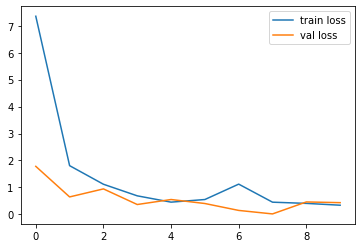

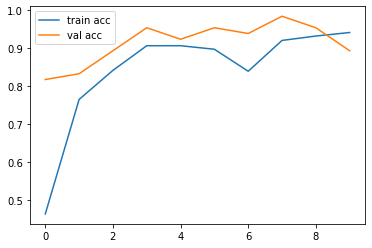

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:


from tensorflow.keras.models import load_model

model.save('model_inception_new.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[1.28511064e-19, 2.81680435e-29, 1.00000000e+00, 1.24323325e-24,
        1.72720978e-18],
       [1.10903990e-07, 9.99982595e-01, 1.06060072e-12, 1.13386827e-15,
        1.73128101e-05],
       [1.94583824e-12, 1.93824690e-25, 6.77564505e-10, 1.60763614e-13,
        1.00000000e+00],
       [2.38580141e-12, 2.35339657e-19, 2.06357872e-22, 1.32628899e-19,
        1.00000000e+00],
       [1.86389378e-33, 5.82678503e-32, 1.00000000e+00, 1.27843952e-29,
        4.64517786e-26],
       [9.69161946e-18, 7.94212979e-23, 2.56506119e-15, 3.33969313e-23,
        1.00000000e+00],
       [2.57230875e-10, 1.00000000e+00, 1.14278865e-17, 2.33846364e-09,
        1.16248735e-08],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.70549739e-34],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [6.19878818e-04, 9.99376237e-01, 7.52505559e-18, 1.38826136e-19,
        3.95065626e-06],
       [1.66302254e-22, 1.3982

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([2, 1, 4, 4, 2, 4, 1, 3, 3, 1, 2, 4, 4, 1, 2, 0, 2, 0, 0, 0, 3, 0,
       2, 2, 0, 2, 4, 1, 1, 4, 3, 3, 0, 4, 4, 0, 2, 3, 3, 0, 4, 0, 3, 4,
       4, 2, 0, 4, 3, 3, 2, 2, 2, 2, 1, 4, 2, 4, 0, 0, 3, 2, 2, 4, 4, 3])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_inception_new.h5')

In [39]:
img_data

array([[[[-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         ...,
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ]],

        [[-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         ...,
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ]],

        [[-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         [-0.9986159 , -0.9967089 , -0.99440217],
         ...,
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ],
         [-0.999108  , -0.9975394 , -0.9955402 ]],

        ...,

        [[-0.99873894, -0.9969858 , -0

In [33]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/O_Toole_ Erin - Google Search/6 Reasons Why Erin O_Toole Wants You To....jpg',target_size=(224,224))


In [34]:
x=image.img_to_array(img)
x

array([[[ 45., 107., 182.],
        [ 45., 107., 182.],
        [ 45., 107., 182.],
        ...,
        [ 29.,  80., 145.],
        [ 29.,  80., 145.],
        [ 29.,  80., 145.]],

       [[ 45., 107., 182.],
        [ 45., 107., 182.],
        [ 45., 107., 182.],
        ...,
        [ 29.,  80., 145.],
        [ 29.,  80., 145.],
        [ 29.,  80., 145.]],

       [[ 45., 107., 182.],
        [ 45., 107., 182.],
        [ 45., 107., 182.],
        ...,
        [ 29.,  80., 145.],
        [ 29.,  80., 145.],
        [ 29.,  80., 145.]],

       ...,

       [[ 41.,  98., 165.],
        [ 42., 108., 182.],
        [ 44., 108., 182.],
        ...,
        [ 29.,  80., 146.],
        [ 29.,  80., 145.],
        [ 29.,  80., 145.]],

       [[ 49., 108., 178.],
        [ 42., 108., 184.],
        [ 45., 107., 180.],
        ...,
        [ 29.,  80., 145.],
        [ 29.,  80., 143.],
        [ 29.,  80., 143.]],

       [[ 48., 106., 180.],
        [ 42., 108., 186.],
        [ 47., 1

In [35]:
x.shape


(224, 224, 3)

In [36]:
x=x/255

In [37]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)


array([[7.8777759e-04, 2.6570985e-02, 6.3807368e-01, 6.1483553e-04,
        3.3395275e-01]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)


In [47]:
a==2






array([ True])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(test_set)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("classification report:\n", classification_report(test_set, y_pred))

In [75]:
img=image.load_img('/content/drive/MyDrive/Test_new/O_Toole_ Erin - Google Search/Erin O_Toole speaks out against the....jpg',target_size=(224,224))
i= image.img_to_array(img)
i= preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred= np.argmax(model.predict(input_arr))

if pred==0:
  print("Blanchet")
elif pred==1:
  print("O_toole_erin")
elif pred==2:
  print("paul_ annamie")
elif pred==3:
  print("Singh_Jagmeet")
elif pred==4:
  print("Justin_Trudeau")
else:
  print("No image")

O_toole_erin


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


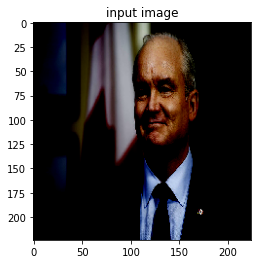

In [76]:
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()